### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [303]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [304]:
data = pd.read_csv('data/coupons.csv')

In [305]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [306]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

* checking columns with null values

In [307]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Let's review the field with the most null values

In [308]:
print(data["car"].value_counts())

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [309]:
# Since the complete data frame has 12684 rows and the field car has 12576 null rows, 
# There is no point in removing rows with null values for this field, instead I will fill them with other value

data["car"].fillna("Unknown", inplace = True)

I clean the rest of the dataframe of null values

In [310]:
data = data.dropna()

clean_data = data.copy()
# Now we have cleaned the data set of null values.
clean_data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

#### We format the information in a more readable way

I'll go through field by field to find which of them can be formatted in a more readable way.

In [311]:
clean_data["time"] = clean_data["time"].str.replace("6PM", "18:00") \
            .str.replace("7AM", "07:00") \
            .str.replace("10AM", "10:00") \
            .str.replace("2PM", "14:00") \
            .str.replace("10PM", "22:00");
clean_data["time"].value_counts()

time
18:00    3078
07:00    3024
10:00    2158
14:00    1916
22:00    1903
Name: count, dtype: int64

For expiration and age, I will convert this field to time format, it is easier to handle for me.

In [312]:
clean_data["expiration"] = clean_data["expiration"].str.replace("1d", "24").replace("2h", "2") 

In [313]:
clean_data["age"] = clean_data["age"].str.replace("50plus", "50").replace("below21", "20")

For the income I would like to manage a numerical type with the value of the highest salary in the range

In [314]:

clean_data['income'] = clean_data['income'] \
                        .str.replace('$100000 or More', '100000') \
                        .str.replace('Less than $12500', '12500')


clean_data["income"].value_counts()

income
$25000 - $37499    1919
$12500 - $24999    1728
100000             1692
$37500 - $49999    1689
$50000 - $62499    1565
12500              1014
$62500 - $74999     840
$87500 - $99999     818
$75000 - $87499     814
Name: count, dtype: int64

I will rename some columns

In [315]:
clean_data = clean_data.rename(
    columns = {
        "age" : "Age", 
        "destination": "Destination",
        "passanger": "Passanger",
        "weather" : "Weather",
        "temperature":"Temperature",
        "time":"Time",
        "coupon": "Coupon",
        "expiration": "ExpirationTime",
        "gender": "Gender",
        "maritalStatus":"MaritalStatus",
        "has_children":"HasChildren",
        "education":"Education",
        "occupation": "Occupation",
        "income": "Income",
        "has_children":"HasChildren",
        "direction_same": "SameDirection",
        "direction_opp": "OppositeDirection",
        "Y": "Accepted"
      })

I was able to identify several fields that had the same format, therefore I am going to create a method to not repeat the code

In [316]:
def format_ranges(dataframe, field):
    # Checking if the field exits in the dataframe
    if field not in dataframe.columns:
        raise ValueError(f"The column '{field}' does not exist.")
    
    # Rename the values in a clear way
    dataframe[field] = dataframe[field].str.replace('less1', 'Less Than 1') \
                .str.replace('1~3', '1 To 3') \
                .str.replace('4~8', '4 To 8') \
                .str.replace('never', 'Never') \
                .str.replace('gt8', 'Greater Than 8')
    return dataframe

Using the method created above

In [317]:
clean_data = format_ranges(clean_data, "Bar")
clean_data = format_ranges(clean_data, "CoffeeHouse")
clean_data = format_ranges(clean_data, "CarryAway")
clean_data = format_ranges(clean_data, "RestaurantLessThan20")
clean_data = format_ranges(clean_data, "Restaurant20To50")


clean_data["Restaurant20To50"].value_counts()

Restaurant20To50
Less Than 1       5859
1 To 3            3202
Never             2070
4 To 8             684
Greater Than 8     264
Name: count, dtype: int64

In [318]:
clean_data.head(5)

,Destination,Passanger,Weather,Temperature,Time,Coupon,ExpirationTime,Gender,Age,MaritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,SameDirection,OppositeDirection,Accepted
22,No Urgent Place,Alone,Sunny,55,14:00,Restaurant(<20),24,Male,21,Single,...,Less Than 1,4 To 8,4 To 8,Less Than 1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10:00,Coffee House,2,Male,21,Single,...,Less Than 1,4 To 8,4 To 8,Less Than 1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10:00,Bar,24,Male,21,Single,...,Less Than 1,4 To 8,4 To 8,Less Than 1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10:00,Carry out & Take away,2,Male,21,Single,...,Less Than 1,4 To 8,4 To 8,Less Than 1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,14:00,Coffee House,24,Male,21,Single,...,Less Than 1,4 To 8,4 To 8,Less Than 1,1,0,0,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



Total percentage of coupons accepted :  56.93%


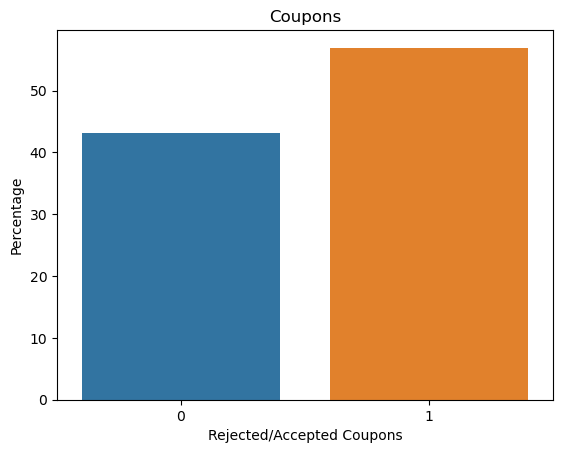

In [319]:
total_rows = clean_data.shape[0]

values = clean_data["Accepted"].value_counts().reset_index()
# We create a column with the percentage of accepted and rejected coupons
values["percentage"] = (values["count"] / total_rows) * 100

total_accepted = values[values["Accepted"] == 1]["percentage"]
print("Total percentage of coupons accepted : " + " " + str(round(float(total_accepted[0]), 2)) + "%")

sns.barplot(x='Accepted', y='percentage', data=values)
plt.xlabel('Rejected/Accepted Coupons')
plt.ylabel('Percentage')
plt.title('Coupons')

plt.show()


5. Use a bar plot to visualize the `coupon` column.

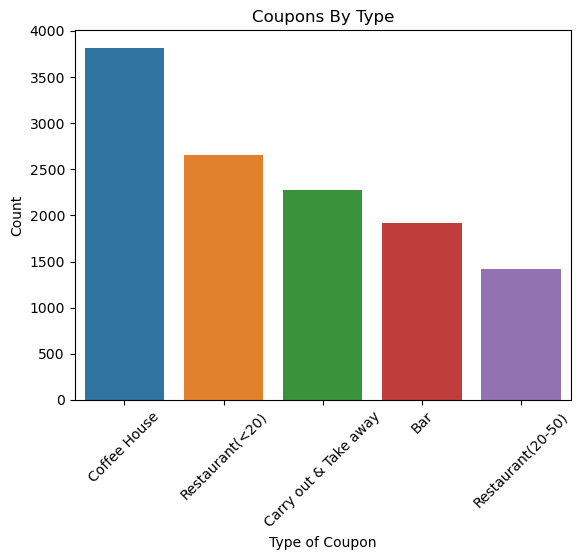

In [320]:
ans5 = clean_data["Coupon"].value_counts().reset_index()
sns.barplot(x='Coupon', y="count", data=ans5)
plt.xticks(rotation=45)
plt.xlabel('Type of Coupon')
plt.ylabel('Count')
plt.title('Coupons By Type')

plt.show()


6. Use a histogram to visualize the temperature column.

/Users/oscardominguez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Temperature Histogram')

<Figure size 700x600 with 0 Axes>

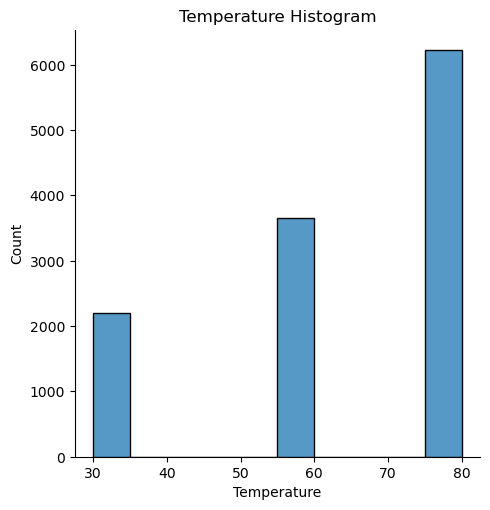

In [321]:
plt.figure(figsize=(7, 6))
sns.displot(data=clean_data, x="Temperature", bins=10)
plt.xlabel('Temperature')
plt.title('Temperature Histogram')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [322]:
new_dataframe = clean_data[clean_data["Coupon"] == "Bar"]
new_dataframe.head(2)

,Destination,Passanger,Weather,Temperature,Time,Coupon,ExpirationTime,Gender,Age,MaritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,SameDirection,OppositeDirection,Accepted
24,No Urgent Place,Friend(s),Sunny,80,10:00,Bar,24,Male,21,Single,...,Less Than 1,4 To 8,4 To 8,Less Than 1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,18:00,Bar,24,Male,21,Single,...,Less Than 1,4 To 8,4 To 8,Less Than 1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [323]:
# total rows with the coupon bar
total_rows_bar = new_dataframe.shape[0]

# We create a column with the percentage of accepted and rejected coupons
accepted_coupons = new_dataframe["Accepted"].value_counts().reset_index()
accepted_coupons["percentage"] = (accepted_coupons["count"] / total_rows_bar) * 100

# total accepted coupons
total_accepted = accepted_coupons[accepted_coupons["Accepted"] == 1]["percentage"][1]

print("Total  percentage of bar coupons accepted : " + " " + str(round(float(total_accepted), 2)) + "%")

Total  percentage of bar coupons accepted :  41.19%


As we can see less than half of the Bar coupons were accepted

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [324]:
# get rows less than or equal to 3 times a month
less_or_3 = new_dataframe[new_dataframe["Bar"].isin(["Never","Less Than 1", "1 To 3"])]

# get rows more than 3 times a month
over_3 = new_dataframe[new_dataframe["Bar"].isin(["4 To 8","Greater Than 8"])]

#totals
total_less_or_3 = less_or_3.shape[0]
total_over_3 = over_3.shape[0]

# Acceptance rates
acceptance_less_than_3 =(less_or_3[less_or_3["Accepted"] == 1].shape[0] / total_less_or_3) * 100
acceptance_over_3 = (over_3[over_3["Accepted"] == 1].shape[0] / total_over_3) * 100


Total acceptance rate of people who went to a bar 3 or fewer times

In [325]:
print(str(round(float(acceptance_less_than_3), 2)) + "%")

37.27%


Total acceptance rate of people who went to a bar 4 or more times

In [326]:
print(str(round(float(acceptance_over_3), 2)) + "%")

76.17%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [373]:

# Filters to apply in dataframe
filter_data = ((new_dataframe['Bar'].isin(["1 To 3", "4 To 8","Greater Than 8"])) &
                                 (new_dataframe['Age'] != '20') & 
                                 (new_dataframe['Age'] != '21'))

# Drivers who went to a bar more than once a month and are over 25
drivers_over_25 = new_dataframe[filter_data]

# The other drivers
other_drivers = new_dataframe[~filter_data]

# Rates
rate_over_25 = drivers_over_25["Accepted"].mean() * 100
rate_other_drivers = other_drivers["Accepted"].mean() * 100

print("Acceptance rate Drivers who went to a bar more than once a month and are over 25: "+" "+str(round(float(rate_over_25), 2)) + "%")
print("Acceptance rate Other Drivers: "+" "+str(round(float(rate_other_drivers), 2)) + "%")


Acceptance rate Drivers who went to a bar more than once a month and are over 25:  68.98%
Acceptance rate Other Drivers:  33.77%


We can see that the acceptance rate of drivers who went to a bar more than once a month is double that of other drivers.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [374]:

# Filters to apply in dataframe
filter_data = ((new_dataframe['Bar'].isin(["1 To 3", "4 To 8","Greater Than 8"])) & 
                        (new_dataframe['Passanger'] != 'Kid(s)') & 
                        (~new_dataframe['Occupation'].isin(['Farming Fishing & Forestry'])))
# values filtered
ans5 = new_dataframe[filter_data]

# the rest of the values that were no filter
other_drivers = new_dataframe[~filter_data]
                         
# Rates
rate_passengers_no_kids = ans5["Accepted"].mean() * 100
rate_other_drivers = other_drivers["Accepted"].mean() * 100

Acceptance rate for drivers who went to a bar and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

In [375]:
print(str(round(float(rate_passengers_no_kids), 2)) + "%")


70.94%


Acceptance rate Other Drivers:

In [376]:
print(str(round(float(rate_other_drivers), 2)) + "%")


29.79%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [380]:
# Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
data_filter_1 = new_dataframe[(new_dataframe['Bar'].isin(["1 To 3", "4 To 8","Greater Than 8"])) & 
                        (new_dataframe['Passanger'] != 'Kid(s)') & 
                        (~new_dataframe['MaritalStatus'].isin(['Widowed']))]

In [390]:
# Drivers who go to bars more than once a month and are under the age of 30
data_filter_2 = new_dataframe[(new_dataframe['Bar'].isin(["1 To 3", "4 To 8","Greater Than 8"])) & 
                        (new_dataframe['Age'] < "30" )]

Age
21    159
26    159
20     10
Name: count, dtype: int64

In [394]:
# Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K.
data_filter_3 = new_dataframe[(new_dataframe['RestaurantLessThan20'].isin(["4 To 8", "Greater Than 8"])) & 
                        (new_dataframe['Income'].isin(["12500","$12500 - $24999","$25000 - $37499", "$37500 - $49999"]))]


Income
$12500 - $24999    96
$37500 - $49999    90
$25000 - $37499    74
12500              73
Name: count, dtype: int64

In [401]:
rate_filter_1 = data_filter_1["Accepted"].mean() * 100
rate_filter_2 = data_filter_2["Accepted"].mean() * 100
rate_filter_3 = data_filter_3["Accepted"].mean() * 100

print(str(round(float(rate_filter_1), 2)) + "%")
print(str(round(float(rate_filter_2), 2)) + "%")
print(str(round(float(rate_filter_3), 2)) + "%")


70.94%
71.95%
45.65%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

#### Observations

According to the study of the Bar coupon we can reach the following conclusions

* Less than half of the Bar coupons were accepted
* people who went to a bar 4 or more times has 38.9% more likely to accept the coupon than people who went 3 times or less
* The acceptance rate of drivers who went to a bar more than once a month is double that of other drivers.
* People who Total went to a bar 4 or more times have a high rate of accetance with 76.17% and it is a trend in the following conclusions
* We can also conclude that Drivers who go to bars more than once a month, had passengers who were not children and were not widowers have a high percentage of acceptance with 70.94%, almost equaling the acceptance of Drivers who go to bars more than once a month and under 30 years old. old, unlike drivers who go to cheap restaurants more than 4 times a month and their income is less than 50K who have less than half acceptance with 45.65%. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [405]:
# I will make a investigation about rate of acceptance in the coupons examining all the occupations
data1 = clean_data.copy()
# first lets review the Occupations that we have 
data1["Occupation"].value_counts()

Occupation
Unemployed                                   1814
Student                                      1497
Computer & Mathematical                      1368
Sales & Related                              1072
Education&Training&Library                    855
Management                                    772
Office & Administrative Support               617
Arts Design Entertainment Sports & Media      564
Business & Financial                          516
Retired                                       473
Food Preparation & Serving Related            276
Healthcare Support                            242
Healthcare Practitioners & Technical          222
Legal                                         219
Community & Social Services                   219
Transportation & Material Moving              218
Protective Service                            175
Architecture & Engineering                    175
Life Physical Social Science                  170
Construction & Extraction              

1. Now I will investigate the acceptance rate by occupation and sort the information in descending order to find out which Occupation has the highest acceptance rate.

In [415]:
# Acceptance rate by Occupation
occupations_aceptance = data1.groupby(["Occupation"])["Accepted"].mean() 
occupations_aceptance = occupations_aceptance.reset_index()
occupations_aceptance["Accepted"] = occupations_aceptance["Accepted"] * 100

I will sort in descending order

In [418]:
occupations_aceptance = occupations_aceptance.sort_values(by="Accepted", ascending=False)

Let's look at it in a more graphic way.

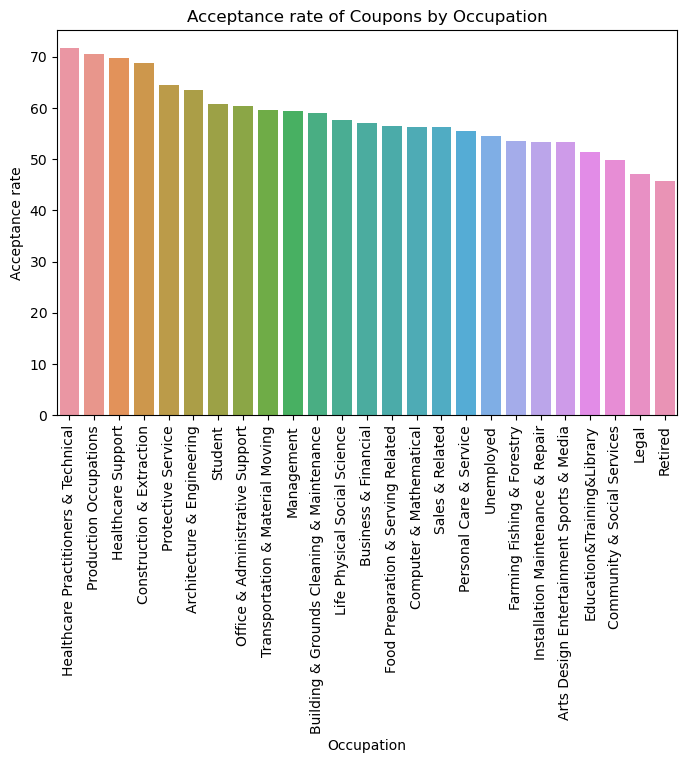

In [557]:
# Plots the accepted coupons for Occupation
plt.figure(figsize=(8, 5))
sns.barplot(x='Occupation', y='Accepted', data=occupations_aceptance)
plt.xlabel('Occupation')
plt.ylabel('Acceptance rate')
plt.title('Acceptance rate of Coupons by Occupation')
plt.xticks(rotation=90)
plt.savefig('images/plot1_2.png')

#### Conclusion 1
The occupation with the highest acceptance rate is Healthcare Practitioners & Technical and the one with the lowest acceptance rate is "Retired"

Now let's review unemployed drivers, which is the occupation with most data in this data frame.

In [459]:
unemployed_data = data1[data1['Occupation'] == "Unemployed"]

In [433]:
unemployed_data["Coupon"].value_counts()

Coupon
Coffee House             551
Restaurant(<20)          397
Carry out & Take away    347
Bar                      292
Restaurant(20-50)        227
Name: count, dtype: int64

Now that we have filtered the data frame with just the unemployed drivers, let's make some analysis for example, which is the coupon that unemployed people accept the most

In [434]:
# Filter by the accepted coupons
unemployed_accepted = unemployed_data[unemployed_data['Accepted'] == 1]
ans2 = unemployed_accepted['Coupon'].value_counts().reset_index()
# Order data in a descending way
ans2 = ans2.sort_values(by = 'count', ascending = False)
ans2

,Coupon,count
0,Coffee House,296
1,Restaurant(<20),266
2,Carry out & Take away,261
3,Bar,87
4,Restaurant(20-50),80


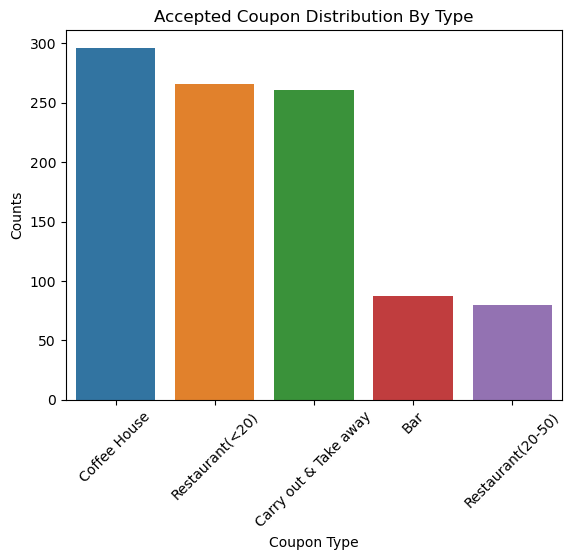

In [547]:
# barplot for Occupation
sns.barplot(data = ans2, x = 'Coupon', y = 'count')
plt.title('Accepted Coupon Distribution By Type')
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.xlabel('Coupon Type')
plt.savefig('images/plot2.png', bbox_inches = 'tight')

#### Conclusion 2
Reviewing the plot The coupon that unemployed people use the most is the "Coffee House" coupon and the one they use the least is the one for the most expensive restaurants

analysis of the use of the coffee coupon by people who were unemployed, on Sunny days and whose temperatures were equal or greater than 55 compared to other climates and other temperatures

In [488]:
#Filter by Sunny Weather and temperatures greater that 55
filter1 = ((unemployed_data['Weather'] == "Sunny") & 
                        (unemployed_data['Temperature'].isin([55,80])) )
           
# Apply filter
ans3 = unemployed_data[filter1]
# Others
ans3_others = unemployed_data[~filter1]

# Rates
rate_ans3 = ans3["Accepted"].mean() * 100
rate_ans3_others = ans3_others["Accepted"].mean() * 100

print("Acceptance rate for Unemployed who use the coupon on sunny days with temperatures above 55"+""+str(round(float(rate_ans3), 2)) + "%")
print("Acceptance rate for others Unemployed"+""+str(round(float(rate_ans3_others), 2)) + "%")

Acceptance rate for Unemployed who use the coupon on sunny days with temperatures above 5559.23%
Acceptance rate for others Unemployed44.92%


Let's review the information graphically

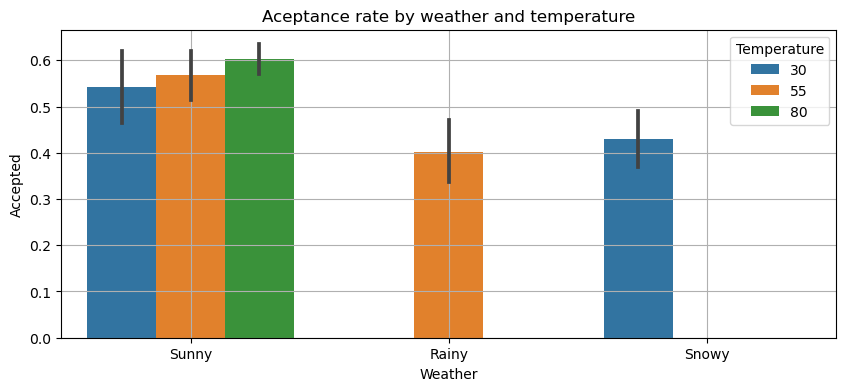

In [548]:
# Barplot by Weather, Accepted and Temperature
plt.figure(figsize=(10,4))
sns.barplot(x='Weather', y='Accepted', data=unemployed_data, hue="Temperature")
plt.title('Aceptance rate by weather and temperature')
plt.ylabel('Accepted')
plt.xlabel('Weather')
plt.grid()
plt.savefig('images/plot3.png', bbox_inches = 'tight')

#### Conclusion 3

The acceptance rate of unemployed people who use the coupon on sunny days with temperatures above 55 is 15% higher than in other climates. We can also see how the climate with the highest acceptance rate is sunny at a temperature of 80.

Now I will focus on analyzing the information for the passengers carried by the driver of unemployed occupation.

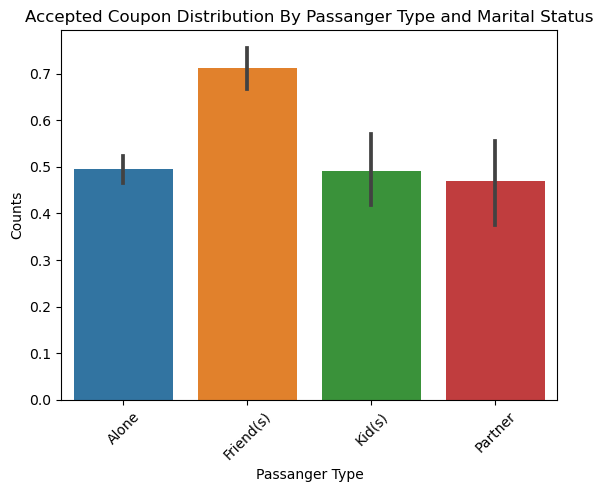

In [549]:
# barplot for Occupation
sns.barplot(data = unemployed_data, x = 'Passanger', y = 'Accepted')
plt.title('Accepted Coupon Distribution By Passanger Type and Marital Status')
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.xlabel('Passanger Type')
plt.savefig('images/plot4.png', bbox_inches = 'tight')

Let's compare unemployed drivers who were accompanied by friends and who were under 25 years old.

In [499]:
# Filters to apply in dataframe

#Filter by Sunny Weather and temperatures greater that 55
filter_data = ((unemployed_data['Passanger'] == "Friend(s)") &
                                 (unemployed_data['Age'] == '20') |
                                 (unemployed_data['Age'] == '21'))

# Apply filter
ans4 = unemployed_data[filter_data]
# Others
ans4_others = unemployed_data[~filter_data]

# Rates
rate_ans4 = ans4["Accepted"].mean() * 100
rate_ans4_others = ans4_others["Accepted"].mean() * 100

print(rate_ans4)
print(rate_ans4_others)


61.18811881188119
52.024446142093204


#### Conclusion 4

We can reach the conclusion that drivers who are unemployed and who are with friends in the car and who are under 25 years old have 9% higher Acceptance Rate than the other drivers.

por ultimo vamos a realizar un analisis de los conductores que estan desempleados y solteros, 
comparando cuando van para casa vs cuando van a "No Urgent Place"

In [539]:
data_single_home = unemployed_data[(unemployed_data["MaritalStatus"] == "Single") &
               (unemployed_data["Destination"] == "Home")]

data_no_urgent = unemployed_data[(unemployed_data["MaritalStatus"] == "Single") &
               (unemployed_data["Destination"].isin(["No Urgent Place"]))]
               

In [540]:
rate_filter_1 = data_single_home["Accepted"].mean() * 100
rate_filter_2 = data_no_urgent["Accepted"].mean() * 100

print(str(round(float(rate_filter_1), 2)) + "%")
print(str(round(float(rate_filter_2), 2)) + "%")

56.12%
71.72%


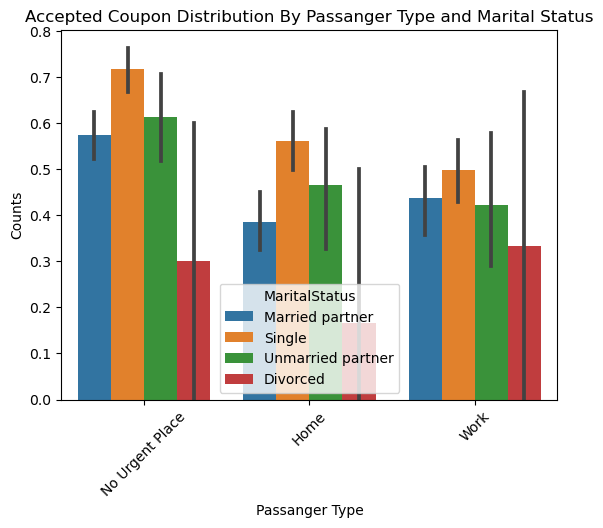

In [550]:
# barplot for Occupation
sns.barplot(data = unemployed_data, x = 'Destination', y = 'Accepted', hue="MaritalStatus")
plt.title('Accepted Coupon Distribution By Passanger Type and Marital Status')
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.xlabel('Passanger Type')
plt.savefig('images/plot5.png', bbox_inches = 'tight')

#### Conclusion 5

We can also conclude that drivers who are single and who are going to a "No Urgent Place" destination are 15% more likely to accept the coupon than those who are going home.